In [1]:
#Import all libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function

#Set some global options
pd.set_option('max_columns',100) #Its nice to see all columns

-------

Start by reading in the NFL Savant Combine data. Notice the 'error_bad_lines' is set to False. 

In [2]:
df = pd.read_csv('data/combine.csv', error_bad_lines=False)

Skipping line 97: expected 26 fields, saw 28
Skipping line 111: expected 26 fields, saw 28



Unfortunately there are two lines that are bad. After visual inspection, those two rows have players with Jr. in the name separated by a comma. Obviously a comma inside a field in a csv file is a problem. But since there are only two such lines, it is much easier to simply manually fix those lines. So instead the data is read in from this modified file.

In [3]:
df = pd.read_csv('data/combine_clean.csv')
df.sample(10)

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,hands,fortyyd,twentyyd,tenyd,twentyss,threecone,vertical,broad,bench,round,college,pick,pickround,picktotal,wonderlic,nflgrade
2293,2008,Kregg Lumpkin,Kregg,Lumpkin,RB,6,1.0,73.0,226,0.000,0.000,4.68,0.0,0.00,0.00,0.00,28.0,111,22,0,NaN,NaN,0,0,0,0.0
2587,2007,James Pinkney,James,Pinkney,QB,6,3.0,75.0,208,0.000,0.000,4.79,0.0,0.00,4.49,0.00,34.0,112,0,0,NaN,NaN,0,0,0,0.0
362,2014,Martavis Bryant,Martavis,Bryant,WR,6,4.0,76.0,211,0.000,0.000,4.42,0.0,0.00,4.15,7.18,39.0,124,16,4,Clemson,0,22,118,0,5.3
1920,2009,Pannel Egboh,Pannel,Egboh,DE,6,6.0,78.0,276,0.000,0.000,4.90,0.0,0.00,4.40,0.00,31.5,116,26,0,NaN,NaN,0,0,0,0.0
3409,2004,Jarrett Payton,Jarrett,Payton,RB,6,1.0,73.0,220,0.000,0.000,4.66,0.0,0.00,4.33,0.00,31.0,115,0,0,NaN,NaN,0,0,0,0.0
1584,2010,Sam Bradford,Sam,Bradford,QB,6,4.0,76.0,236,34.375,9.500,4.79,0.0,0.00,0.00,0.00,0.0,0,0,1,Oklahoma,1(1),1,1,36,0.0
2947,2006,Jamar Williams,Jamar,Williams,OLB,6,1.0,73.0,236,0.000,0.000,4.59,0.0,0.00,4.29,0.00,37.0,120,0,4,Arizona State,23(120),23,120,0,0.0
684,2013,Alan Bonner,Alan,Bonner,WR,5,10.0,70.0,193,30.250,9.375,4.59,0.0,1.63,4.15,0.00,33.0,117,14,6,Jacksonville State,27(195),27,195,0,0.0
4858,1999,Johnny Rutledge,Johnny,Rutledge,ILB,6,2.0,74.0,245,0.000,0.000,4.63,0.0,0.00,4.21,0.00,33.0,115,18,2,Florida,20(51),20,51,0,0.0
323,2014,Davante Adams,Davante,Adams,WR,6,1.0,73.0,212,0.000,0.000,4.56,0.0,0.00,4.30,6.82,39.5,123,14,2,Fresno St.,0,21,53,0,6.0


A first step is to get a sense of what is in the data: info() and describe().

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4947 entries, 0 to 4946
Data columns (total 26 columns):
year                 4947 non-null int64
name                 4947 non-null object
firstname            4947 non-null object
lastname             4947 non-null object
position             4947 non-null object
heightfeet           4947 non-null int64
heightinches         4947 non-null float64
heightinchestotal    4947 non-null float64
weight               4947 non-null int64
arms                 4947 non-null float64
hands                4947 non-null float64
fortyyd              4947 non-null float64
twentyyd             4947 non-null float64
tenyd                4947 non-null float64
twentyss             4947 non-null float64
threecone            4947 non-null float64
vertical             4947 non-null float64
broad                4947 non-null int64
bench                4947 non-null int64
round                4947 non-null int64
college              3477 non-null object
pick   

In [5]:
df.describe()

,year,heightfeet,heightinches,heightinchestotal,weight,arms,hands,fortyyd,twentyyd,tenyd,twentyss,threecone,vertical,broad,bench,round,pickround,picktotal,wonderlic,nflgrade
count,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000,4947.000000
mean,2007.132201,5.805337,4.371437,74.035476,245.579745,7.640243,2.252426,4.610386,0.073734,0.129149,3.298106,1.503002,28.741257,95.944006,15.723873,2.435415,11.318981,71.879523,1.144532,0.700627
std,5.029664,0.395981,3.279223,2.614778,45.639366,13.801035,4.070448,0.974087,0.432330,0.436941,1.907526,2.929683,11.596749,41.826340,10.840896,2.476746,12.262220,79.417514,5.524047,1.813870
min,1999.000000,5.000000,0.000000,65.000000,155.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,6.000000,2.000000,73.000000,208.000000,0.000000,0.000000,4.530000,0.000000,0.000000,3.835000,0.000000,28.000000,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,6.000000,4.000000,74.000000,237.000000,0.000000,0.000000,4.690000,0.000000,0.000000,4.240000,0.000000,32.500000,112.000000,18.000000,2.000000,7.000000,42.000000,0.000000,0.000000
75%,2012.000000,6.000000,6.000000,76.000000,289.000000,0.000000,0.000000,4.990000,0.000000,0.000000,4.470000,0.000000,35.500000,119.000000,24.000000,5.000000,21.000000,134.000000,0.000000,0.000000
max,2015.000000,6.000000,11.875000,82.000000,386.000000,37.750000,11.375000,6.050000,2.980000,1.920000,5.560000,8.310000,46.000000,147.000000,51.000000,8.000000,53.000000,262.000000,48.000000,7.500000


In addition to missing elements already present in the dataset, there are also zeroes which represent missing, or null, data. There are also duplicated columns. These need to be (slowly) changed. It should also be noted that all the columns seem to be the correct type.

In [6]:
df.drop(['firstname','lastname','heightfeet','heightinches'], axis=1, inplace=True) #Only need one name and height column
df = df.replace(0,np.nan) #Make missing data explicit

To find how much missing data we have, we can count it across all columns. From the following, we see that there are significant missing values.

In [7]:
df.isnull().sum()/len(df)*100

year                  0.000000
name                  0.000000
position              0.000000
heightinchestotal     0.000000
weight                0.000000
arms                 76.490803
hands                76.470588
fortyyd               3.860926
twentyyd             97.170002
tenyd                91.934506
twentyss             24.782697
threecone            79.098444
vertical             12.573277
broad                15.403275
bench                26.177481
round                38.467758
college              29.714979
pick                 36.203760
pickround            38.467758
picktotal            38.467758
wonderlic            95.512432
nflgrade             86.941581
dtype: float64

Part of this is to be expected. Not all players will do all tasks (for a few reasons). But this can be broken down by **position** to see this if this effect can be seen (by **position**). 

In [8]:
df.groupby("position").apply(lambda x: x.notnull().mean())

,year,name,position,heightinchestotal,weight,arms,hands,fortyyd,twentyyd,tenyd,twentyss,threecone,vertical,broad,bench,round,college,pick,pickround,picktotal,wonderlic,nflgrade
position,,,,,,,,,,,,,,,,,,,,,,
C,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.619048,0.000000,0.000000,0.619048,0.571429,0.666667,0.619048,0.714286,0.333333,1.000000,0.571429,0.333333,0.333333,0.000000,1.000000
CB,1.0,1.0,1.0,1.0,1.0,0.230612,0.230612,0.969388,0.002041,0.055102,0.738776,0.195918,0.900000,0.889796,0.810204,0.697959,0.775510,0.712245,0.697959,0.697959,0.004082,0.144898
DE,1.0,1.0,1.0,1.0,1.0,0.231325,0.231325,0.963855,0.024096,0.086747,0.732530,0.216867,0.855422,0.848193,0.840964,0.679518,0.756627,0.701205,0.679518,0.679518,0.004819,0.125301
DT,1.0,1.0,1.0,1.0,1.0,0.224324,0.224324,0.948649,0.000000,0.040541,0.718919,0.172973,0.840541,0.797297,0.848649,0.635135,0.718919,0.662162,0.635135,0.635135,0.000000,0.116216
FB,1.0,1.0,1.0,1.0,1.0,0.088235,0.088235,0.980392,0.000000,0.000000,0.794118,0.039216,0.921569,0.911765,0.882353,0.588235,0.637255,0.607843,0.588235,0.588235,0.000000,0.058824
FS,1.0,1.0,1.0,1.0,1.0,0.180095,0.180095,0.966825,0.000000,0.037915,0.725118,0.127962,0.886256,0.857820,0.862559,0.620853,0.696682,0.630332,0.620853,0.620853,0.004739,0.104265
ILB,1.0,1.0,1.0,1.0,1.0,0.213333,0.213333,0.973333,0.000000,0.048889,0.715556,0.120000,0.862222,0.813333,0.844444,0.600000,0.680000,0.622222,0.600000,0.600000,0.004444,0.120000
K,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.111111,0.111111,1.000000,0.444444,0.111111,0.111111,0.000000,0.888889
LS,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.500000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.500000


There is definitely some variability in the missing values depending on the position. Is there possibly a change over the various years?

In [9]:
df.groupby("year").apply(lambda x: x.notnull().mean()).T

year,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
year,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
name,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
position,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
heightinchestotal,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
weight,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
arms,0.000000,0.000000,0.000000,0.003704,0.000000,0.014545,0.017544,0.039146,0.036900,0.022305,0.119298,0.996552,0.996700,0.684713,0.996516,0.000000,0.000000
hands,0.000000,0.000000,0.000000,0.003704,0.000000,0.014545,0.017544,0.039146,0.040590,0.022305,0.119298,0.996552,0.996700,0.684713,0.996516,0.000000,0.000000
fortyyd,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.989474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.859873,0.947735,0.800000,0.807453
twentyyd,0.007958,0.007752,0.015038,0.018519,0.019305,0.025455,0.035088,0.053381,0.051661,0.033457,0.042105,0.051724,0.069307,0.031847,0.027875,0.000000,0.000000
tenyd,0.010610,0.007752,0.015038,0.018519,0.019305,0.025455,0.035088,0.053381,0.055351,0.040892,0.042105,0.051724,0.069307,0.079618,0.864111,0.000000,0.000000


There does not seem to be terribly large deviations from year to year in any specific column. It is interesting to note that the **threecone** drill has no records in 1999. Similarly, the **wonderlic** test is only available to 2012. However, it is obvious that there is missing **college** data. This might be a problem so it needs to be looked at. Additionally, while not all players at the Combine will be drafted (so null data is expected), there seems to be more nulls in the draft pick data than initial expectations. This also needs to be looked at. 

Before tackling these problems, a feature can be added. This one works to address the multiple **positions**. A **positiongroup** is added to condense and re-classify related **positions**. This can be done with a simple function and apply() on the dataframe. 

In [10]:
def label_positiongroup (row):
    if row.position == 'C' :
        return 'OL'
    if row.position == 'OC':
        return 'OL'
    if row.position == 'OT':
        return 'OL'
    if row.position == 'OG':
        return 'OL'
    if row.position == 'RB':
        return 'BA'
    if row.position == 'FB':
        return 'BA'
    if row.position == 'WR':
        return 'RE'
    if row.position == 'TE':
        return 'RE'
    if row.position == 'QB':
        return 'QB'
    if row.position == 'DE':
        return 'DL'
    if row.position == 'DT':
        return 'DL'    
    if row.position == 'NT':
        return 'DL'
    if row.position == 'ILB':
        return 'LB'  
    if row.position == 'OLB':
        return 'LB'
    if row.position == 'CB':
        return 'DB'
    if row.position == 'FS':
        return 'DB'
    if row.position == 'SS':
        return 'DB'
    if row.position == 'K':
        return 'ST'
    if row.position == 'P':
        return 'ST'
    if row.position == 'LS':
        return 'ST'
    return 'WHAT'

df['positiongroup'] = df.apply(lambda row: label_positiongroup(row),axis=1)
#Make sure all positions are classified properly
df.positiongroup.unique()

array(['BA', 'RE', 'LB', 'DB', 'DL', 'ST', 'QB', 'OL'], dtype=object)

With that out of the way, let's tackle that first issue of missing **college** values. The wonderful __[Sports Reference](https://www.sports-reference.com/)__ site also has Combine data. The plan is to join this data to the existing dataframe and fill in the missing data.

Sports Reference lists each __[year](https://www.pro-football-reference.com/draft/2017-combine.htm)__ of the Combine separately in HTML tables. Using BeautifulSoup, a simple scraper can be used to extract the data. Because this means multiple calls need to be made to their site, it is good practice to save the results of the scrape locally and avoid unnecessary traffic. Thus, this specific code is included in its own script as shown below. As before, some initial impressions of the data should be made.

In [11]:
if not os.path.isfile('data/sports-ref-scrape.pkl'):
    print('It seems the Sports Reference dataset is not available. The website will be scraped and the output saved locally.')
    import scraping_sr
    print('Finished with the scrape.')
    
df_sr = pd.read_pickle('data/sports-ref-scrape.pkl')
df_sr.sample(10)

It seems the Sports Reference dataset is not available. The website will be scraped and the output saved locally.
Finished with the scrape.


,Player,Pos,School,Ht,Wt,40yd,Vertical,BenchReps,BroadJump,3Cone,Shuttle,Team,Round,Pick,Year
80,Reuben Droughns,RB,Oregon,5-11,215,4.66,30.0,13,115,7.34,4.41,Detroit Lions,3,81,2000
1427,Mike Karney,FB,Arizona State,5-11,254,5.02,30.0,25,103,,,New Orleans Saints,5,156,2004
537,Dennis Norman,OG,Princeton,6-4,305,5.16,35.0,25,107,8.08,4.72,Seattle Seahawks,7,222,2001
4566,Khalid Wooten,CB,Indiana,5-11,210,4.53,33.5,17,117,6.95,4.18,,NaN,NaN,2013
5136,Marcus Peters,CB,Washington,6-0,197,4.53,37.5,17,121,7.08,4.08,Kansas City Chiefs,1,18,2015
4645,Dominique Easley,DT,Florida,6-2,288,4.93,,26,,,,New England Patriots,1,29,2014
1657,Doug Buckles,OG,Mississippi,6-5,311,5.53,23.5,18,89,8.17,4.80,,NaN,NaN,2005
4290,Jonathan Cooper,OG,North Carolina,6-2,311,5.07,27.0,35,108,7.78,4.84,Arizona Cardinals,1,7,2013
1582,Benjamin Watson,TE,Georgia,6-3,258,4.50,35.5,34,123,7.38,4.11,New England Patriots,1,32,2004
1479,Josh Parrish,OT,Washington State,6-6,330,5.41,28.0,20,104,8.24,4.61,,NaN,NaN,2004


In [12]:
df_sr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5224 entries, 0 to 5223
Data columns (total 15 columns):
Player       5224 non-null object
Pos          5224 non-null object
School       5224 non-null object
Ht           5224 non-null object
Wt           5224 non-null object
40yd         5224 non-null object
Vertical     5224 non-null object
BenchReps    5224 non-null object
BroadJump    5224 non-null object
3Cone        5224 non-null object
Shuttle      5224 non-null object
Team         5224 non-null object
Round        3332 non-null object
Pick         3332 non-null object
Year         5224 non-null int64
dtypes: int64(1), object(14)
memory usage: 612.3+ KB


An initial issue is seen in this data scrape: all columns in the dataframe are set to strings. This is no good since there are clearly certain columns which are numeric. Some cleaning of this dataframe must be done.

In [13]:
#Set columns to numeric
df_sr['Wt']        = pd.to_numeric(df_sr['Wt'])
df_sr['40yd']      = pd.to_numeric(df_sr['40yd'])
df_sr['Vertical']  = pd.to_numeric(df_sr['Vertical'])
df_sr['BroadJump'] = pd.to_numeric(df_sr['BroadJump'])
df_sr['BenchReps'] = pd.to_numeric(df_sr['BenchReps'])
df_sr['3Cone']     = pd.to_numeric(df_sr['3Cone'])
df_sr['Shuttle']   = pd.to_numeric(df_sr['Shuttle'])
df_sr['Pick']      = pd.to_numeric(df_sr['Pick'])
df_sr['Round']     = pd.to_numeric(df_sr['Round'])
#Recode the height of a player to inches
df_sr['Ht']        = pd.to_numeric(df_sr['Ht'].str.split('-').str.get(0))*12 + pd.to_numeric(df_sr['Ht'].str.split('-').str.get(1))
#Check the dataframe again
df_sr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5224 entries, 0 to 5223
Data columns (total 15 columns):
Player       5224 non-null object
Pos          5224 non-null object
School       5224 non-null object
Ht           5224 non-null int64
Wt           5224 non-null int64
40yd         5176 non-null float64
Vertical     3993 non-null float64
BenchReps    3477 non-null float64
BroadJump    3965 non-null float64
3Cone        3399 non-null float64
Shuttle      3442 non-null float64
Team         5224 non-null object
Round        3332 non-null float64
Pick         3332 non-null float64
Year         5224 non-null int64
dtypes: float64(8), int64(3), object(4)
memory usage: 612.3+ KB


Things look better now. And like before, the amount of null values can be printed. In this case it is done per **Year**. Note that **School** (equivalent to **college**) has zero null values. 

In [14]:
df_sr.groupby("Year").apply(lambda x: x.notnull().mean()).T

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Player,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Pos,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
School,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Ht,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Wt,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
40yd,0.968847,0.968847,0.984375,1.000000,0.997015,0.984894,0.993902,0.993865,1.000000,0.996942,0.990798,1.000000,0.996914,1.000000,0.978979,0.996894
Vertical,0.710280,0.663551,0.759375,0.714734,0.722388,0.749245,0.810976,0.757669,0.787879,0.782875,0.776074,0.835866,0.820988,0.750000,0.807808,0.776398
BenchReps,0.545171,0.542056,0.634375,0.564263,0.573134,0.601208,0.649390,0.671779,0.700000,0.749235,0.760736,0.778116,0.750000,0.716867,0.729730,0.677019
BroadJump,0.735202,0.669782,0.750000,0.711599,0.725373,0.716012,0.814024,0.736196,0.775758,0.776758,0.779141,0.826748,0.787037,0.777108,0.786787,0.773292
3Cone,0.632399,0.573209,0.600000,0.611285,0.594030,0.670695,0.695122,0.665644,0.651515,0.685015,0.638037,0.762918,0.675926,0.611446,0.660661,0.680124


The pandas merge() method is used to outer join the two dataframes together. Here they will be joined on player name, draft year and position to ensure uniqueness. 

In [15]:
df2 = df.merge(df_sr, left_on=['name','year','position'],right_on=['Player','Year','Pos'],how='outer',indicator=True)
df2.sample(5)

,year,name,position,heightinchestotal,weight,arms,hands,fortyyd,twentyyd,tenyd,twentyss,threecone,vertical,broad,bench,round,college,pick,pickround,picktotal,wonderlic,nflgrade,positiongroup,Player,Pos,School,Ht,Wt,40yd,Vertical,BenchReps,BroadJump,3Cone,Shuttle,Team,Round,Pick,Year,_merge
2078,2009.0,Mark Sanchez,QB,74.0,227.0,NaN,NaN,4.93,NaN,NaN,4.21,7.06,32.5,116.0,NaN,1.0,USC,5(5),5.0,5.0,28.0,NaN,QB,Mark Sanchez,QB,Southern California,74.0,227.0,4.93,32.5,NaN,116.0,7.06,4.21,New York Jets,1.0,5.0,2009.0,both
1575,2010.0,Chris Bell,WR,74.0,211.0,32.25,9.125,4.50,NaN,NaN,4.35,6.76,35.0,117.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RE,Chris Bell,WR,Norfolk State,74.0,211.0,4.50,35.0,15.0,117.0,6.76,4.35,,NaN,NaN,2010.0,both
4175,2001.0,Eric Kelly,CB,71.0,199.0,NaN,NaN,4.46,NaN,NaN,4.18,NaN,36.0,119.0,15.0,3.0,Kentucky,7(69),7.0,69.0,NaN,NaN,DB,Eric Kelly,CB,Kentucky,70.0,199.0,4.46,36.0,15.0,120.0,7.24,4.18,Minnesota Vikings,3.0,69.0,2001.0,both
5419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,David Lonie,P,California,77.0,209.0,4.74,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,2006.0,right_only
2357,2008.0,Jerome Simpson,WR,74.0,199.0,NaN,NaN,4.42,2.57,1.47,4.52,7.08,37.5,136.0,NaN,2.0,Coastal Carolina,15(46),15.0,46.0,NaN,NaN,RE,Jerome Simpson,WR,Coastal Carolina,74.0,199.0,4.42,37.5,NaN,136.0,7.08,4.52,Cincinnati Bengals,2.0,46.0,2008.0,both


With the two datasets joined, attention must be turned to how to combine the data within rows. That is, with previous inspection, each dataset has some players the other does not. Further, even amount common players, some data is missing in one dataset while it is present in the other. First, let's try to quantify this effect. 

A simple function can be written to print out the percentage of null values in each column of a dataframe and a combined column. 

In [16]:
def compare_cols(thedf,col1,col2):
    ''' Compare columns on newly joined dataframe:
        - Function expects second column to be from Sports Reference
        - Create temp df with all NaN's filled to an obvious value
        - Combine the columns where necessary (prefer the Sports Reference dataset)
        - Reintroduce NaNs and count the null data percentage for the three columns and print
    '''
    df_temp = thedf[[col1,col2]].fillna(-1)
    
    conditions = [df_temp[col2] > 0, df_temp[col1] > 0]
    arrays = [df_temp[col2], df_temp[col1]]
    df_temp['combined'] = np.select(conditions, arrays, default=np.nan)
    
    df_temp.replace(-1,np.nan,inplace=True)
    
    df_print = pd.DataFrame(df_temp.apply(lambda x: x.notnull().mean())).T
    print(df_print.to_string(index=False))


compare_cols(df2,'broad','BroadJump')

broad  BroadJump  combined
0.695992   0.659571  0.780975


The **broad** jump drill is used to test the compare_cols() function. The two individual datasets have over 30% missing data. However, combining the two can decrease that by almost 10%. That's not too bad. A few more columns can be checked to see how well this combining can be.

In [17]:
compare_cols(df2,'fortyyd','40yd')
compare_cols(df2,'threecone','3Cone')
compare_cols(df2,'weight','Wt')

fortyyd      40yd  combined
0.790953  0.860968  0.987194
threecone     3Cone  combined
 0.171961  0.565442   0.59388
weight        Wt  combined
0.822717  0.868951       1.0


Things look pretty good with this method. The **weight** column even gets down to 0% null values. Let's make sure we return those combined columns and add them to the current dataframe.

In [18]:
def combine_cols(thedf,col1,col2):
    ''' Combine columns on newly joined dataframe:
        - Function expects second column to be from Sports Reference
        - Create temp df with all NaN's filled to an obvious value
        - Combine the columns where necessary (prefer the Sports Reference dataset)
        - Reintroduce NaNs and count the null data percentage for the three columns and print
        - Return the newly combined column
    '''
    #Columns can also be of string type
    if(thedf[col1].dtype == np.float64 or thedf[col1].dtype == np.int64):
        fillvalue = -1
    else:
        fillvalue = 'nan'        
        
    df_temp = thedf[[col1,col2]].fillna(fillvalue)
    
    conditions = [df_temp[col2] != fillvalue, df_temp[col1] != fillvalue]
    arrays = [df_temp[col2], df_temp[col1]]
    
    df_temp['combined'] = np.select(conditions, arrays, default=np.nan)
    df_temp.replace(fillvalue,np.nan,inplace=True)
    
    df_print = pd.DataFrame(df_temp.apply(lambda x: x.notnull().mean())).T
    print (df_print.to_string(index=False),end='\n\n')

    return(df_temp['combined']) #return the combined column

In [19]:
df2['broad_c']     = combine_cols(df2,'broad','BroadJump')
df2['fortyyd_c']   = combine_cols(df2,'fortyyd','40yd')
df2['vertical_c']  = combine_cols(df2,'vertical','Vertical')
df2['bench_c']     = combine_cols(df2,'bench','BenchReps')
df2['threecone_c'] = combine_cols(df2,'threecone','3Cone')
df2['shuttle_c']   = combine_cols(df2,'twentyss','Shuttle')
df2['college_c']   = combine_cols(df2,'college','School')
df2['height_c']    = combine_cols(df2,'heightinchestotal','Ht')
df2['weight_c']    = combine_cols(df2,'weight','Wt')
df2['year_c']      = combine_cols(df2,'year','Year')

df2['name_c']      = combine_cols(df2,'name','Player') #The string type columns
df2['round_c']     = combine_cols(df2,'pickround','Round')
df2['pick_c']      = combine_cols(df2,'picktotal','Pick')
df2['position_c']  = combine_cols(df2,'position','Pos')

broad  BroadJump  combined
0.695992   0.659571  0.780975

fortyyd      40yd  combined
0.790953  0.860968  0.987194

vertical  Vertical  combined
0.719275  0.664228  0.791452

bench  BenchReps  combined
0.607351   0.578247  0.680193

threecone     3Cone  combined
 0.171961  0.565442   0.59388

twentyss   Shuttle  combined
0.618826  0.572593  0.686845

college    School  combined
0.578247  0.868951  0.948778

heightinchestotal        Ht  combined
         0.822717  0.868951       1.0

weight        Wt  combined
0.822717  0.868951       1.0

year      Year  combined
0.822717  0.868951       1.0

name    Player  combined
0.822717  0.868951       1.0

pickround     Round  combined
 0.506236  0.554299  0.636787

picktotal      Pick  combined
 0.506236  0.554299  0.636787

position       Pos  combined
0.822717  0.868951       1.0



In all columns there was at least a ~10% increase in data. That works pretty well. Since there are many duplicated columns, the columns can be pruned to just the ones needed. However, before keeping columns to a new dataframe, some cleaning needs to be done on this current dataframe.

First, the **Team** column has blank strings that are not NaN. Second, the **college_c** column has some universities labelled differently. For instance, the University of Southern California is labelled as USC in one dataset and Southern California in the other. Let's tackle both problems.

In [20]:
#Make sure NaN is there
df2.Team.replace(u'', np.nan, regex=True,inplace=True)

#Make sure college names are consistent
df2.college_c = df2.college_c.replace('St\.','State',regex=True) #By far easiest change is this
df2.college_c = df2.college_c.replace('UCF','Central Florida',regex=False)
df2.college_c = df2.college_c.replace('USC','Southern California',regex=False)
df2.college_c = df2.college_c.replace('California-Davis','UC Davis',regex=False)
df2.college_c = df2.college_c.replace('Saginaw Valley State','Saginaw Valley',regex=False)
df2.college_c = df2.college_c.replace('Southern University','Southern',regex=False)
df2.college_c = df2.college_c.replace('Ole Miss','Mississippi',regex=False)
df2.college_c = df2.college_c.replace('Brigham Young','BYU',regex=False)
df2.college_c = df2.college_c.replace('N.C. State','North Carolina State',regex=False)

#Special line for L. Gunter who has ambiguous college name
df2.loc[df2.college_c == 'Miami','college_c'] = 'Miami (FL)'

Now a new dataframe can be created, df3, with only the necessary columns. 

In [21]:
keep_cols = ['name_c','year_c','college_c','position_c','height_c','weight_c','fortyyd_c','vertical_c','bench_c','threecone_c','shuttle_c','broad_c','wonderlic','nflgrade','arms','hands','Team','round_c','pick_c']

df3 = df2[keep_cols]
df3.columns = ['name','year','college','position','height','weight','fortyyd','vertical','bench','threecone','shuttle','broad','wonderlic','nflgrade','arms','hands','team','round','pick']
df3.sample(5)

,name,year,college,position,height,weight,fortyyd,vertical,bench,threecone,shuttle,broad,wonderlic,nflgrade,arms,hands,team,round,pick
3208,David Stewart,2005.0,Mississippi State,OT,78.0,314.0,5.25,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tennessee Titans,4.0,113.0
296,Max Valles,2015.0,Virginia,OLB,77.0,251.0,4.83,36.5,NaN,7.59,4.37,121.0,NaN,5.4,NaN,NaN,Oakland Raiders,6.0,179.0
2293,Kregg Lumpkin,2008.0,Georgia,RB,71.0,226.0,4.68,28.0,22.0,NaN,NaN,111.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3984,Antwaan Randle El,2002.0,Indiana,WR,70.0,191.0,4.49,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,NaN,Pittsburgh Steelers,2.0,62.0
3106,Brandon Jones,2005.0,Oklahoma,WR,73.0,210.0,4.42,37.0,NaN,7.03,4.08,114.0,NaN,NaN,NaN,NaN,Tennessee Titans,3.0,96.0


As was mentioned before, the other big issue with the Combine data is the draft pick and round are not quite right. There seems to be more nulls than expected. Looking back at the initial dataframe, df, another issue can be seen.

In [22]:
df[df.pick.notnull()][['pick','round']] #Look at the non-null pick columns

,pick,round
322,0,6.0
323,0,2.0
324,0,4.0
325,0,5.0
326,0,2.0
327,0,NaN
328,0,4.0
329,0,NaN
330,0,NaN
331,0,2.0


An immediate problem is spotted in the first few rows displayed: the **pick** is shown as 0 while the **pickround** and **picktotal** columns clearly are not null. Further inspection of the **pickround** data shows another issue: it is mislabelled. It is not the round in which the pick was made but rather the pick number in a specific round. In other words, in the seven-round draft there are seven number one picks, one at the top of each round. The purpose of this analysis is to predict the draft round, so this needs to be addressed. 

A simple solution would be to map the two columns to the actual round. This would work in principle, except the draft is not fully static over time. The distribution of certain __[sections of picks](https://en.wikipedia.org/wiki/National_Football_League_Draft#Compensatory_picks)__ is not constant over time. There are also cases where inidividual teams __[lose draft picks](https://en.wikipedia.org/wiki/National_Football_League_Draft#Forfeiture)__ for disciplinary reasons. Given these constraints it is much easier to go back and get the actual draft picks and order to define the actual pick round. This also solves the case of the missing data since complete records of the draft are plentiful.

I decided to scrape the conveniently named __[DraftHistory](http://www.drafthistory.com/index.php/years/)__ and use BeautifulSoup. As before, this entails multiple calls to a website, so it should be scraped and then saved locally. This is done below.

In [23]:
if not os.path.isfile('data/draft-history-scrape.pkl'):
    print('It seems the DraftHistory dataset is not available. The website will be scraped and the output saved locally.')
    import scraping_dh
    print('Finished with the scrape.')
        
df_dh = pd.read_pickle('data/draft-history-scrape.pkl')

It seems the DraftHistory dataset is not available. The website will be scraped and the output saved locally.
Finished with the scrape.


Let's take a quick look at this new dataset.

In [24]:
df_dh.sample(10)

,Round,Pick,Player,Name,Team,Position,College,Year
3386,3.0,11,74,Donald Stephenson,Chiefs,T,Oklahoma,2012
2790,7.0,34,243,Marko Mitchell,Redskins,WR,Nevada,2009
2033,7.0,40,248,Aaron Merz,Bills,G,California,2006
3517,6.0,35,205,Billy Winn,Browns,DT,Boise State,2012
3098,2.0,8,40,Bruce Carter,Cowboys,LB,North Carolina,2011
1689,5.0,23,159,Jeb Huckeba,Seahawks,LB,Arkansas,2005
1657,4.0,26,127,Alvin Pearman,Jaguars,RB,Virginia,2005
777,1.0,25,25,Charles Grant,Saints,DE,Georgia,2002
2602,2.0,23,55,William Moore,Falcons,DB,Missouri,2009
694,6.0,25,188,Rick Crowell,Dolphins,LB,Colorado State,2001


The idea now is to join the two datasets so that the pick round, in this case **Round**, is properly assigned to the existing Combine data.

In [25]:
#Use pd.merge with indicator on (to check for error)
#Since only the Combine data is wanted, a left join is used (not outer)
df4 = df3.merge(df_dh, left_on=['year','pick'], right_on=['Year','Player'],how='left',indicator=True)

In order to check this join worked as intended, the indicator column, **_merge**, is used to select those players that were not in the draft dataset. These players then must not have been drafted, since they are not present in the draft dataset. By selecting the pick number, **picktotal**, and getting the unique values, only NaN should exist. 

In [26]:
df4[df4['_merge']=='left_only']['pick'].unique()

array([ nan])

Good. Another sanity check is to make sure all the draft pick data is complete. The usual null values can be summed.

In [27]:
df4.isnull().sum()/len(df4)*100

name          0.000000
year          0.000000
college       5.122235
position      0.000000
height        0.000000
weight        0.000000
fortyyd       1.280559
vertical     20.854815
bench        31.980708
threecone    40.612007
shuttle      31.315483
broad        21.902544
wonderlic    96.307999
nflgrade     89.256611
arms         80.658573
hands        80.641942
team         44.570098
round        36.321304
pick         36.321304
Round        36.321304
Pick         36.321304
Player       36.321304
Name         36.321304
Team         36.321304
Position     36.321304
College      36.321304
Year         36.321304
_merge        0.000000
dtype: float64

Uh-oh. Both versions of **pick/Pick** and **round/Round** share the same 36.3%. But **team**, the team drafting the player, is missing more often at 44.5%! This will need to be taken care of as well. 

Let's use the compare_cols function defined earlier to see how the null data compare.

In [28]:
compare_cols(df4,'team','Team')

team      Team  combined
0.554299  0.636787  0.636787


As suspected, the second column completely covers the first (1 - 0.636787 = 0.363213). So we can again use the previously defined combine_cols function. But first, we need to reconcile the fact that both columns do not share the same content. That is the first column uses the full team name while the second column only uses a team nickname. 

In [29]:
df4['team']  = df4['team'].str.rsplit(' ',2).str.get(1)

Utilizing the rsplit str method the team nickname can be extracted and then re-assigned back to **team**. As before, combine_cols will make combining the two columns easy. 

In [30]:
df4['team'] = combine_cols(df4,'team','Team')

team      Team  combined
0.554299  0.636787  0.636787



That should have done the trick. Moving on, extra columns are in this dataframe. So let's start re-naming and dropping columns. 

In [31]:
#Only the draft pick/round info is needed, so keep that info and drop the rest
df4['round']   = df4['Round']
df4['pick']    = df4['Pick']
df4['overall'] = df4['Player']

df4.drop(df_dh.columns,axis=1,inplace=True)
df4.drop('_merge',axis=1,inplace=True)

We can print out several rows to make sure the dataframe looks like we want.

In [32]:
df4.sample(10)

,name,year,college,position,height,weight,fortyyd,vertical,bench,threecone,shuttle,broad,wonderlic,nflgrade,arms,hands,team,round,pick,overall
4505,Tutan Reyes,2000.0,Mississippi,OT,75.0,299.0,5.37,26.5,20.0,7.49,4.88,99.0,NaN,NaN,NaN,NaN,Saints,5.0,2.0,131.0
1648,Clifton Geathers,2010.0,South Carolina,DE,79.0,299.0,4.98,36.0,26.0,7.69,NaN,112.0,NaN,NaN,37.750,11.125,Browns,6.0,17.0,186.0
2775,Santonio Holmes,2006.0,Ohio State,WR,71.0,188.0,4.35,38.0,NaN,6.82,4.26,126.0,NaN,NaN,32.000,9.625,Steelers,1.0,25.0,25.0
1365,Mark Herzlich,2011.0,Boston College,OLB,76.0,244.0,4.91,32.5,29.0,7.32,4.46,112.0,NaN,NaN,32.375,10.000,NaN,NaN,NaN,NaN
4288,Fred Wakefield,2001.0,Illinois,DE,79.0,287.0,5.09,29.0,26.0,7.49,4.64,108.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
636,Jimmie Ward,2014.0,Northern Illinois,SS,71.0,193.0,4.59,NaN,9.0,NaN,NaN,NaN,NaN,5.1,NaN,NaN,49ers,1.0,30.0,30.0
824,Brandon McGee,2013.0,Miami (FL),CB,71.0,193.0,4.40,33.5,14.0,6.71,4.18,119.0,NaN,NaN,32.000,9.125,Rams,5.0,16.0,149.0
3482,Michael Turner,2004.0,Northern Illinois,RB,70.0,237.0,4.49,31.0,22.0,7.50,4.15,114.0,NaN,NaN,NaN,NaN,Chargers,5.0,22.0,154.0
101,Cody Fajardo,2015.0,Nevada,QB,73.0,223.0,4.63,32.5,NaN,6.95,4.10,118.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
1620,Kavell Conner,2010.0,Clemson,OLB,72.0,242.0,4.59,33.5,24.0,7.36,4.60,110.0,NaN,NaN,32.750,9.500,Colts,7.0,33.0,240.0


Now that the dataframe is clean, the last step in this wrangling process is to replace, or impute, the missing data. Let's remind ourselves how much null data needs to be imputed.

In [33]:
df4.isnull().sum()/len(df4)*100

name          0.000000
year          0.000000
college       5.122235
position      0.000000
height        0.000000
weight        0.000000
fortyyd       1.280559
vertical     20.854815
bench        31.980708
threecone    40.612007
shuttle      31.315483
broad        21.902544
wonderlic    96.307999
nflgrade     89.256611
arms         80.658573
hands        80.641942
team         36.321304
round        36.321304
pick         36.321304
overall      36.321304
dtype: float64

There are of course many ways to impute missing data. Since this is still the initial pass of the entire analysis chain (with modeling yet to be done), simplicty is preferable. Thus, I will replace the missing values by the mean or median of the relevant column. We of course only want to impute values in the columns with the various Combine tasks and physical measurables. No string type or draft pick columns will be touched (at least not at this stage).

Before just performing the imputation, it is prudent to take a quick look at the distributions of the relevant columns. One of the easiest is a boxplot. Let's do that now.

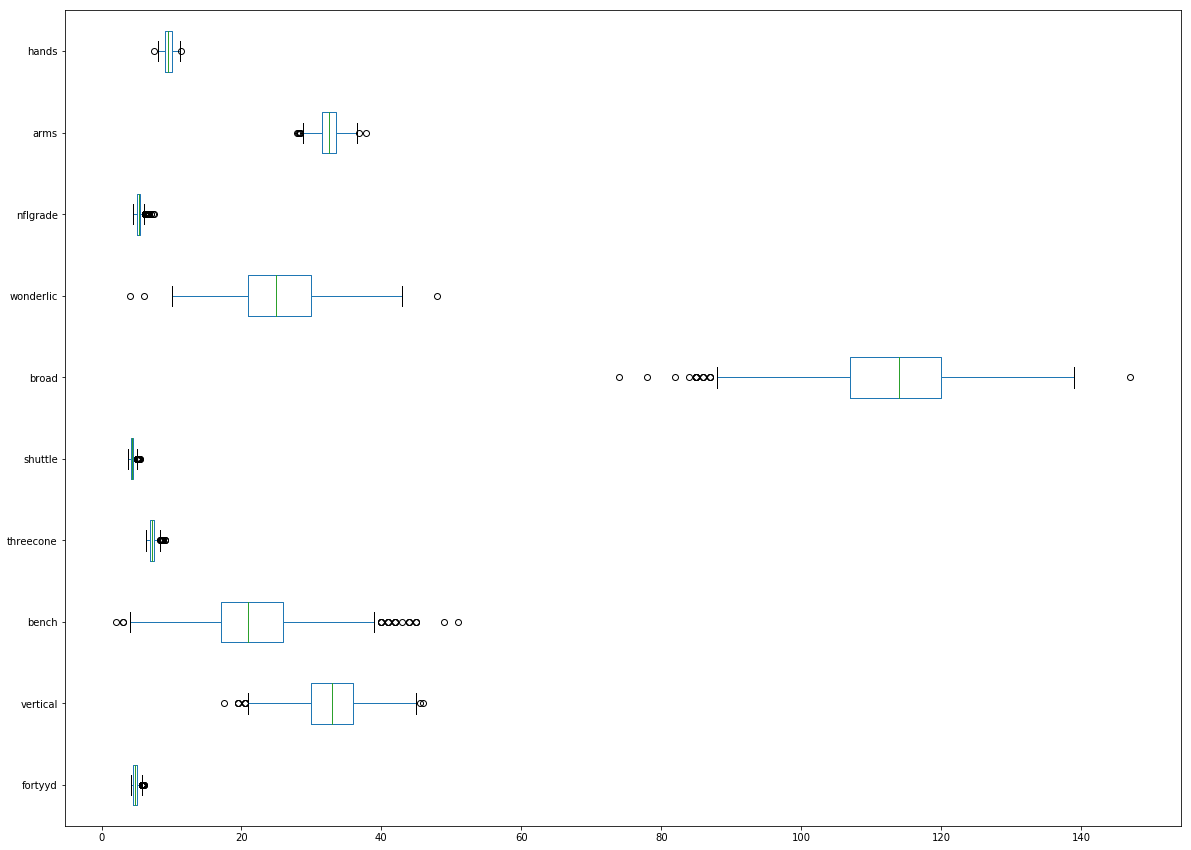

In [34]:
#The columns of interest for imputation
cols = ['fortyyd','vertical','bench','threecone','shuttle','broad','wonderlic','nflgrade','arms','hands']

df4[cols].plot.box(vert=False,figsize=(20,15))
plt.show()

Its good to visualize how the various columns are distributed. It would be useful to get some useful statistics for each column as well. There are also some noticable outliers in some of the columns. Let's try to quantify that too. We can use the interquantile range to estimate a count of outliers (i.e. k=1.5). In general there are at least a sample size of a couple hundred and considering this numbers represent measurements of human traits, a normal distribution seems to be a good assumption. Given this we can also estimate how many outliers we might expect given the sample size.

In [35]:
#Obtain outliers defined by the usual interquartile range (see boxplots)
def outliers(arr):
    k = 1.5
    quartile1, quartile3 = np.nanpercentile(arr, [25, 75])
    iqr = quartile3 - quartile1
    lo_lim = quartile1 - (iqr * k)
    up_lim = quartile3 + (iqr * k)
    return np.where((arr > up_lim) | (arr < lo_lim))[0]

#Print out sample statistics including outlier info
def get_stats(col):  
    #Only care about certain columns
    if col.name not in cols:
        return col
    
    #Count outliers and expected number of outliers
    num_outliers = len(outliers(col))
    num_ex_outliers = col.count() * 0.0027 #3-sigma cutoff (normal dist)
    
    #Print out mean/median/std/sample size/min/zscore of min/max/zscore of max/estimated outliers/expected outliers for each column
    print('%9s|\tmean: %.3f\tmedian: %.2f\tstd: %.3f \tsize: %i' % (col.name, col.mean(), col.median(), col.std(), col.count()))
    print('%9s|\tmin: %.3f\tzs_min: %.2f\tmax: %.2f\tzs_max: %.2f' % ('', col.min(), (col.mean()-col.min())/col.std(), col.max(), (col.max()-col.mean())/col.std() ))
    print('%9s|\toutliers: %i\texpected outliers: %.1f\n' % ('_________', num_outliers, num_ex_outliers))

df5 = df4.apply(get_stats)    

  fortyyd|	mean: 4.801	median: 4.72	std: 0.313 	size: 5936
         |	min: 4.220	zs_min: 1.85	max: 6.05	zs_max: 3.99
_________|	outliers: 19	expected outliers: 16.0

 vertical|	mean: 32.798	median: 33.00	std: 4.253 	size: 4759
         |	min: 17.500	zs_min: 3.60	max: 46.00	zs_max: 3.10
_________|	outliers: 10	expected outliers: 12.8

    bench|	mean: 21.397	median: 21.00	std: 6.421 	size: 4090
         |	min: 2.000	zs_min: 3.02	max: 51.00	zs_max: 4.61
_________|	outliers: 24	expected outliers: 11.0

threecone|	mean: 7.285	median: 7.19	std: 0.422 	size: 3571
         |	min: 6.300	zs_min: 2.33	max: 9.12	zs_max: 4.34
_________|	outliers: 37	expected outliers: 9.6

  shuttle|	mean: 4.389	median: 4.35	std: 0.268 	size: 4130
         |	min: 3.730	zs_min: 2.46	max: 5.56	zs_max: 4.37
_________|	outliers: 28	expected outliers: 11.2

    broad|	mean: 113.177	median: 114.00	std: 9.398 	size: 4696
         |	min: 74.000	zs_min: 4.17	max: 147.00	zs_max: 3.60
_________|	outliers: 17	expected outlier

Of the 10 columns we examine, 8 have a greater number of outliers than expected. Now this is not necessarily alarming, since graphically we don't see anything too absurd. But it does seem to suggest that perhaps the median of each column should be used instead of mean just to make sure. However, the difference between the mean and median is not large in any of the 10 columns, so this may just be a bit over-cautious. Regardless, I think this is a good habit to have so we will stick with using the median as the imputation value.

We can define another simple function which will impute the relevant columns.

In [36]:
def impute_col(col):   
    #Only care about certain columns
    if col.name not in cols:
        return col
    
    #Return the imputed column
    return col.fillna(col.median()) 
    
df5 = df4.apply(impute_col)        
df5.sample(50)

,name,year,college,position,height,weight,fortyyd,vertical,bench,threecone,shuttle,broad,wonderlic,nflgrade,arms,hands,team,round,pick,overall
2381,Terrell Thomas,2008.0,Southern California,CB,72.0,202.0,4.45,30.5,14.0,7.18,4.35,123.0,25.0,5.3,32.500,9.500,Giants,2.0,32.0,63.0
647,Chris Whaley,2014.0,Texas,DT,75.0,269.0,5.02,33.0,21.0,7.19,4.35,114.0,25.0,5.0,32.500,9.500,NaN,NaN,NaN,NaN
5384,Chris Spencer,2005.0,Mississippi,C,75.0,309.0,5.21,32.0,26.0,8.06,4.59,105.0,25.0,5.3,32.500,9.500,Seahawks,1.0,26.0,26.0
3945,Seth McKinney,2002.0,Texas A&M,OC,76.0,300.0,4.97,33.5,23.0,7.19,4.51,105.0,25.0,5.3,32.500,9.500,Dolphins,3.0,25.0,90.0
3267,Sean Bubin,2004.0,Illinois,OT,78.0,306.0,5.32,24.5,25.0,7.66,4.76,97.0,25.0,5.3,32.500,9.500,Jaguars,5.0,27.0,159.0
4416,Windrell Hayes,2000.0,Southern California,WR,71.0,204.0,4.50,33.0,21.0,7.33,4.18,114.0,25.0,5.3,32.500,9.500,Jets,5.0,14.0,143.0
1768,David Reed,2010.0,Utah,WR,72.0,191.0,4.56,37.0,15.0,6.95,4.38,114.0,25.0,5.3,31.750,9.375,Ravens,5.0,25.0,156.0
1904,Jason Cook,2009.0,Mississippi,FB,71.0,244.0,4.71,33.0,21.0,7.19,4.35,114.0,25.0,5.3,32.500,9.500,NaN,NaN,NaN,NaN
4835,Mike Peterson,1999.0,Florida,OLB,74.0,233.0,4.47,36.0,18.0,7.19,4.08,118.0,25.0,5.3,32.500,9.500,Colts,2.0,5.0,36.0
2346,Ahtyba Rubin,2008.0,Iowa State,DT,75.0,315.0,5.20,28.0,35.0,8.05,5.00,106.0,25.0,5.3,32.500,9.500,Browns,6.0,24.0,190.0


Another check with isnull() should tell us the imputation was successful. 

In [37]:
df5.isnull().sum()/len(df5)*100

name          0.000000
year          0.000000
college       5.122235
position      0.000000
height        0.000000
weight        0.000000
fortyyd       0.000000
vertical      0.000000
bench         0.000000
threecone     0.000000
shuttle       0.000000
broad         0.000000
wonderlic     0.000000
nflgrade      0.000000
arms          0.000000
hands         0.000000
team         36.321304
round        36.321304
pick         36.321304
overall      36.321304
dtype: float64

Good; so the df5 dataframe is now the fully cleaned of the Combine drill/task data. Now the last thing to do is fix the NaN in the pick columns. That is, we should define them to be something (i.e. undrafted) rather than NaN. For now, this value will be -1, so that it is obvious what it represents.  

In [38]:
df5[['round','pick','overall']] = df5[['round','pick','overall']].fillna(-1)

Some changes may need to be made in the future, but for now this is the final dataframe. Let's save this locally as well, so that it can be plugged into the machine learning/modeling script easily. 

In [39]:
df5.to_pickle('data/cleaned_df.pkl')

-------
Et fin.